In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd
import numpy as np
import os
import pybedtools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from tqdm import tnrange, tqdm_notebook

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/'

# other useful locations:
motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/CGAUG_RBFOX2_MOTIF_POSITIONS_ALL.bed'
apo_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/UGUA_APOBEC_MOTIF_POSITIONS_ALL.bed'

# peak files:
# peak_file = '/home/bay001/projects/kris_apobec_20200121/reference_data/SLBP_K562_IDR.bed'
# peak_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200228_kris_eclip/IDR/kris_apobec/results/annotate/inputs/PAPO1.vs.PAPO2.bed'
# peak_file = '/home/elvannostrand/data/clip/CLIPseq_analysis/seCLIP/seRBFOX2_B_01.basedon_seRBFOX2_B_01.peaks.l2inputnormnew.bed.compressed.bed'
# peak_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/inputs/seRBFOX2_A_01.basedon_seRBFOX2_A_01.peaks.l2inputnormnew.bed.compressed.bed'
# peak_file = '/projects/ps-yeolab5/shsathe/stress_unstress_clips/TIA1/293T/bed_files/idr/tia1_ut_idr/results/TIA1_Untreated_reproducible_peaks.bed'
# peak_file = '/home/bay001/projects/ryan_editing_20190314/permanent_data/02_idr/outputs/ApoFox_reproducible_peaks.bed'
# peak_file = '/home/elvannostrand/data/clip/CLIPseq_analysis/ALLCLIP_v12_20160112/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'
# peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/RBFOX2_peaks.w_motif.bed'
peak_with_motif_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/outputs/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.with.GCATG.bed'

# annotated peak files:
# annotated_peak_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200228_kris_eclip/IDR/kris_apobec/annotate/inputs/PAPO1.vs.PAPO2.bed.annotated_proxdist_miRlncRNA'
annotated_peak_file = '/home/elvannostrand/data/clip/CLIPseq_analysis/ALLCLIP_v12_20160112/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'
# annotated_peak_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_1/inputs/seRBFOX2_A_01.basedon_seRBFOX2_A_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'
# annotated_peak_file = '/home/elvannostrand/data/clip/CLIPseq_analysis/seCLIP/seRBFOX2_B_01.basedon_seRBFOX2_B_01.peaks.l2inputnormnew.bed.compressed.bed.annotated'

# Only get randomized regions from 3'UTR or CDS:
# regions_file_for_random_subset = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/hg19_v19_cds_and_three_prime_utrs.bed'
regions_file_for_random_subset = '/projects/ps-yeolab3/bay001/annotations/hg19/gencode_v19/hg19_v19_basic_cds_and_three_prime_utrs.bed'

# edit files:
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/SLBP_1000_72hr_A_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.bed'
edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Sample19_S17_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/Sample20_S18_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_c10.annotated'
# edit_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_c20.annotated'

# windows files:
# window_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/SLBP_1000_72hr_A_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows.txt'
window_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows.txt'
# window_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/Sample20_S18_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows.txt'
# BAM files:
bam_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'

# Genome file
chrom_sizes = '/projects/ps-yeolab3/bay001/annotations/hg19/hg19.chrom.sizes'

In [ ]:
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/'

# First let's figure out a proper 'background' region. Best is any expressed CDS+3'UTR region?

In [ ]:
# Create a SAF file of just 3'UTRs and CDS
regions_file_for_random_subset_SAF = os.path.join(output_dir, os.path.splitext(os.path.basename(regions_file_for_random_subset))[0] + ".SAF")

utr_bed = pd.read_csv(
    regions_file_for_random_subset, 
    sep='\t', 
    names=['chrom','start','end','name','score','strand']
)
utr_bed['start1base'] = utr_bed['start'] + 1
utr_saf = utr_bed[['name','chrom','start1base','end','strand']]
utr_saf.to_csv(regions_file_for_random_subset_SAF, sep='\t', index=False, header=False)

In [3]:
output_counts = os.path.join(output_dir, '{}.counts.txt'.format(os.path.basename(bam_file)))

In [ ]:
# Call featureCounts on BAM file and convert to TPM. Grey this out if we're only testing the one sample.

cmd = "module load subreadfeaturecounts;featureCounts "
cmd += "-a {} ".format(regions_file_for_random_subset_SAF) 
cmd += "-F SAF -o {} ".format(output_counts)
cmd += "{}".format(bam_file)
print(cmd)
! $cmd

### Convert to counts and generate a subset of 3'UTRs to sample from using a TPM cutoff of... 3? 5?

In [4]:

def counts_to_rpkm(feature_counts_table):
    counts = feature_counts_table.ix[:,5:]
    lengths = feature_counts_table['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)

def counts_to_tpm(counts_table, skip_col=5):
    """
    simple function that converts a featureCounts pandas Dataframe
    into a TPM dataframe.
    
    :param counts_table: pandas.DataFrame() 
        either a featureCounts table (first five cols contain non-count info,
        the rest contain raw counts) or a generic counts table (use skip_col=0
        in this case)
    :return tpm: pandas.DataFrame
    """
    rpkm = counts_to_rpkm(counts_table)
    tpm = rpkm.div(rpkm.sum())*pow(10,6)
    return tpm

counts_table = pd.read_csv(output_counts, index_col=0, skiprows=1, sep='\t')
tpm = counts_to_tpm(counts_table)
tpm.sort_values(by=bam_file, ascending=False).head()

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,
ENSG00000140988.11,17679.154714
ENSG00000111640.10,14561.884498
ENSG00000231500.2,14215.381116
ENSG00000198804.2,13100.881627
ENSG00000142937.7,12273.030579


# Main params

In [5]:
# Restrict our 'random' peak regions to just genes with a TPM cutoff (across 3'UTR and CDS only) of this number.
tpm_cutoff = 5

# edit conf level
CONF = 0.99 
# defines how close an edit needs to be from a peak to be a 'close' edit.
d = 300

# peak params
l2fc = 3
l10p = 3

# window edit/
window_filter = 0.002

In [6]:
expressed_genes = tpm[tpm[bam_file]>=tpm_cutoff]

bed = pd.read_csv(regions_file_for_random_subset, sep='\t', names=['chrom','start','end','name','score','strand'])
expressed = list(expressed_genes.index)
print("Number of expressed genes with TPM cutoff of {}".format(len(expressed)))

Number of expressed genes with TPM cutoff of 9077


In [7]:
bed_expressed = bed[bed['name'].isin(expressed)]

In [8]:
regions_file_for_random_subset_expressed = os.path.join(output_dir, os.path.splitext(os.path.basename(regions_file_for_random_subset))[0] + ".expressed.bed")
bed_expressed.to_csv(regions_file_for_random_subset_expressed, sep='\t', index=False, header=False)

# Find how many peaks HAVE ANY nearby edit.

In [9]:
def read_and_return_peak_bedtool(fn, annotated='yes', l2fc=l2fc, l10p=l10p):
    if annotated == 'yes':
        peaks = pd.read_csv(fn, names=['chrom','start','end','l10p','l2fc','strand','annotation','geneid'], sep='\t')
        print("Total number of peaks: {}".format(peaks.shape[0]))
        peaks['region'] = peaks['annotation'].apply(lambda x: x.split('|')[0])
        peaks = peaks[(peaks['region']=='CDS') | (peaks['region']=='3utr')]
        peaks = peaks[(peaks['l10p']>=l10p) & (peaks['l2fc']>=l2fc)]
        peaks = peaks[['chrom','start','end','geneid','l2fc','strand']]
    elif annotated == 'motif':
        peaks = pd.read_csv(fn, names=['chrom','start','end','l10p','l2fc','strand'], sep='\t')
        print(peaks.shape[0])
    elif annotated == 'no':
        peaks = pd.read_csv(fn, names=['chrom','start','end','l10p','l2fc','strand'], sep='\t')
        print(peaks.shape[0])
        peaks = peaks[(peaks['l10p']>=l10p) & (peaks['l2fc']>=l2fc)]
    print(peaks.shape[0])
    unmerged_peaks = pybedtools.BedTool.from_dataframe(peaks).sort()
    merged_peaks = unmerged_peaks.merge(d=1, c=(4,5,6), o=('collapse','collapse','distinct')).sort()
    print(merged_peaks.to_dataframe().shape[0])
    return merged_peaks

#### Also worth knowing how many 'peaks' lie in areas with little/no coverage.

In [10]:
expressed_genes = set(bed_expressed['name'])
peaks = pd.read_csv(annotated_peak_file, names=['chrom','start','end','l10p','l2fc','strand','annotation','geneid'], sep='\t')
print(peaks.shape[0])
peaks['region'] = peaks['annotation'].apply(lambda x: x.split('|')[0])
peaks = peaks[(peaks['region']=='CDS') | (peaks['region']=='3utr')]
peaks = peaks[(peaks['l10p']>=l10p) & (peaks['l2fc']>=l2fc)]
peaks = peaks[['chrom','start','end','geneid','l2fc','strand']]
peaks['expressed'] = peaks['geneid'].apply(lambda x: x in expressed_genes)
expressed_peaks = peaks[peaks['expressed']==True].shape[0]
nonexpressed_peaks = peaks[peaks['expressed']==False].shape[0]
print("Number of peaks with expression: {}. Number of peaks without sufficient expression: {} ({}%)".format(
    expressed_peaks,
    nonexpressed_peaks,
    (100*expressed_peaks)/(expressed_peaks + nonexpressed_peaks)
))

74902
Number of peaks with expression: 520. Number of peaks without sufficient expression: 135 (79.38931297709924%)


# These peaks should have little coverage across the genic regions specified (3'UTR, CDS')

In [11]:
peaks[peaks['expressed']==False]

,chrom,start,end,geneid,l2fc,strand,expressed
84,chr7,4829864,4829945,ENSG00000242802.2,3.348279,+,False
98,chr7,100164379,100164460,ENSG00000106351.8,3.855762,+,False
213,chr7,100164480,100164534,ENSG00000106351.8,3.660746,+,False
1843,chr7,82543863,82543944,ENSG00000186472.15,4.478908,-,False
1852,chr7,82543721,82543784,ENSG00000186472.15,4.367015,-,False
1882,chr7,82543784,82543844,ENSG00000186472.15,4.113259,-,False
1948,chr7,1479645,1479697,ENSG00000164877.14,3.622272,-,False
4959,chr14,21557056,21557210,ENSG00000165801.5,3.880425,+,False
5030,chr14,24780454,24780561,ENSG00000213906.5|ENSG00000272658.1,3.047025,+,False
5085,chr14,53020306,53020446,ENSG00000180998.7,3.997781,+,False


# Some peaks are right next to each other, so we need to merge them together. This helps avoid double counting (although this notebook doesn't discard these edits as we just care about the closest edit near a peak)

In [12]:
peaks = read_and_return_peak_bedtool(annotated_peak_file, annotated='yes')

Total number of peaks: 74902
655
496


# Read in and filter our edits file. Just 3'UTR and CDS edits only at whichever conf level.
- Also will try and save your filtered edits file here: FILTERED_EDITS.bed

403256
60605


,chrom,start,end,region,conf,strand
81,chr1,2239485,2239486,3utr,0.999388,+
91,chr1,2239851,2239852,3utr,0.994820,+
93,chr1,2239899,2239900,3utr,0.999271,+
96,chr1,2239930,2239931,3utr,0.999584,+
97,chr1,2239932,2239933,3utr,0.991599,+


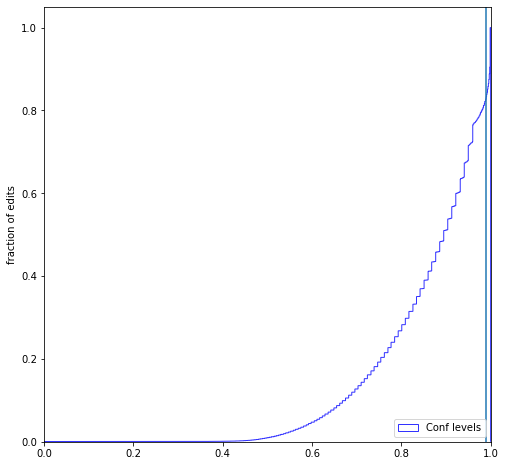

In [13]:
edits_df = pd.read_csv(edit_file, sep='\t', names=['chrom','start','end','conf','count','strand','geneid','genename','region','annotation'])
fig, ax = plt.subplots(figsize=(8, 8))
x = plt.hist(edits_df['conf'], bins=1000, density=True, cumulative=True,
         histtype='step', alpha=0.8, color='blue', label='Conf levels')
plt.ylabel('fraction of edits')
plt.xlim(0, 1)
plt.axvline(CONF)
plt.legend(loc=4)

print(edits_df.shape[0])
edits_df = edits_df[edits_df['conf']>CONF][['chrom','start','end','region','conf','strand']]
edits_df = edits_df[(edits_df['region']=='3utr') | (edits_df['region']=='CDS')]
edits_df.to_csv(os.path.join(output_dir, 'FILTERED_EDITS.bed'), sep='\t', index=False, header=False)
print(edits_df.shape[0])
edits_df.head()

In [14]:
edits = pybedtools.BedTool.from_dataframe(edits_df).sort()

## Let's look for the nearest edit less than or equal to d (upstream or downstream) from a peak.

params:
- k=1 get the closest 1 edit
- d=True get the distance
- s=True look for close edits on the same strand only

headers:
- pchrom, pstart, pend, pname, pscore, pstrand = the peak locations
- echrom, estart, eend, ename, escore, estrand = coordinates of the closest edit
- dist = distance from peak to the closest edit

In [15]:
closest = peaks.closest(edits, s=True, t='first', k=1, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)
print(closest.shape[0])
closest.sort_values(by='dist', ascending=False).head()

496


,pchrom,pstart,pend,pname,pscore,pstrand,echrom,estart,eend,ename,escore,estrand,dist
67,chr10,108336578,108336611,ENSG00000108018.11,3.73474704835596,-,chr10,105360779,105360780,3utr,0.999388,-,2975799
66,chr10,108335936,108335988,ENSG00000108018.11,3.2372473888851405,-,chr10,105360779,105360780,3utr,0.999388,-,2975157
217,chr17,77756131,77756256,ENSG00000173894.6,3.45283463231648,+,chr17,76221160,76221161,3utr,0.993825,+,1534971
216,chr17,77755899,77756032,"ENSG00000173894.6,ENSG00000173894.6","3.97760357225213,4.93638090952561",+,chr17,76221160,76221161,3utr,0.993825,+,1534739
215,chr17,77755664,77755726,ENSG00000173894.6,3.0993194806518196,+,chr17,76221160,76221161,3utr,0.993825,+,1534504


### close = found at least one edit less than or equal to [d]istance from a peak. far = closest edit found is more than d away.
- also need to filter out any edit where 'estart' = -1 since this means a peak could not find any close edit.

In [16]:
close = closest[(np.abs(closest['dist']) <= d) & (closest['estart']!=-1)].shape[0]
far = closest[(np.abs(closest['dist']) > d) | (closest['estart']==-1)].shape[0]

# Peaks with edits more/less than [d] distance away.

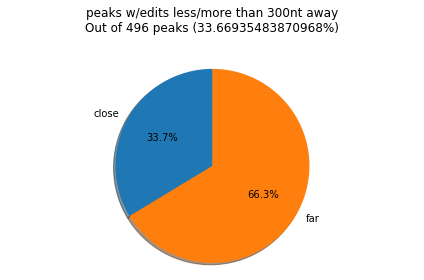

In [17]:
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

### Let's look at a random set of peaks and see how many windows overlap/are nearby

### randomize peak locations across gencode-annotated 3'UTRs and CDS regions.
- or just 3'UTR/CDS on their own.
- regions_file_for_random_subset_expressed = 3'UTR/CDS regions of genes that met the TPM expression cutoff.
- you can check the random df 

In [18]:
random = peaks.shuffle(genome='hg19', incl=regions_file_for_random_subset_expressed, noOverlapping=True)
random = random.sort()
random_df = random.to_dataframe()
random_df.head()

,chrom,start,end,name,score,strand
0,chr1,1248006,1248118,ENSG00000188878.12,5.29546200283044,-
1,chr1,3712472,3712524,ENSG00000164877.14,3.62227231909755,-
2,chr1,8716056,8716169,ENSG00000122140.6,3.47890814392637,+
3,chr1,9643975,9644024,ENSG00000168101.10,3.7526689563532205,+
4,chr1,10365518,10365637,ENSG00000154358.15,4.5421019704135706,+


In [19]:
closest = random.closest(edits, t='first', k=1, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)
print(closest.shape[0])
closest.head()

496


,pchrom,pstart,pend,pname,pscore,pstrand,echrom,estart,eend,ename,escore,estrand,dist
0,chr1,1248006,1248118,ENSG00000188878.12,5.29546200283044,-,chr1,1254720,1254721,CDS,0.992503,-,6603
1,chr1,3712472,3712524,ENSG00000164877.14,3.62227231909755,-,chr1,3697568,3697569,3utr,0.999946,-,14904
2,chr1,8716056,8716169,ENSG00000122140.6,3.47890814392637,+,chr1,8415033,8415034,3utr,0.997310,-,301023
3,chr1,9643975,9644024,ENSG00000168101.10,3.7526689563532205,+,chr1,9640067,9640068,CDS,0.992751,+,3908
4,chr1,10365518,10365637,ENSG00000154358.15,4.5421019704135706,+,chr1,10366114,10366115,3utr,0.996564,+,478


In [20]:
close = closest[(np.abs(closest['dist']) <= d) & (closest['estart']!=-1)].shape[0]
far = closest[(np.abs(closest['dist']) > d) | (closest['estart']==-1)].shape[0]

# Random peaks with edits more/less than [d] distance away.

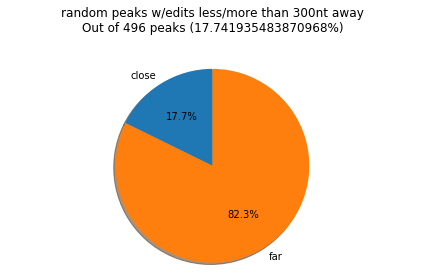

In [21]:
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("random peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

### Let's see if using windows improve (or not)

In [22]:
window = pd.read_csv(window_file, sep='\t')
window['region'] = window['name'].apply(lambda x:x.split('|')[-1])
window = window[(window['region']=='CDS') | (window['region']=='3utr')]
window.head()

,chrom,start,end,name,score,strand,edit_coverage,editable_coverage,edited_over_edited_c,all_c_coverage,edited_over_all_c,region
22,chr1,877779,877828,ENSG00000187634.6|CDS,0.960596,+,1,5,0.200000,92,0.010870,CDS
24,chr1,879267,879316,ENSG00000187634.6|CDS,0.941480,+,1,7,0.142857,84,0.011905,CDS
25,chr1,879629,879678,ENSG00000188976.6|3utr,0.987691,-,8,81,0.098765,199,0.040201,3utr
26,chr1,879635,879684,ENSG00000188976.6|3utr,0.842943,-,8,81,0.098765,164,0.048780,3utr
27,chr1,879637,879686,ENSG00000188976.6|3utr,0.826169,-,8,81,0.098765,164,0.048780,3utr


In [23]:
filtered_window = window[
    (window['edited_over_all_c']>window_filter) & \
    (window['score']>CONF)
]
print(filtered_window.shape[0])
filtered_window = filtered_window[['chrom','start','end','all_c_coverage','edit_coverage','strand']]
filtered_window = pybedtools.BedTool.from_dataframe(filtered_window).sort()

55172


In [24]:
closest = peaks.closest(filtered_window, s=True, t='first', k=1, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)
closest.head()

,pchrom,pstart,pend,pname,pscore,pstrand,echrom,estart,eend,ename,escore,estrand,dist
0,chr1,988764,988899,"ENSG00000188157.9,ENSG00000188157.9","7.01829847153027,5.82644688249277",+,chr1,2239461,2239510,169,6,+,1250563
1,chr1,1235435,1235474,ENSG00000131584.14,3.03172878611309,-,chr1,1254696,1254745,446,3,-,19223
2,chr1,1418041,1418105,ENSG00000160072.15,3.2457089676333397,+,chr1,2239461,2239510,169,6,+,821357
3,chr1,11721467,11721549,ENSG00000132879.9,3.5317600261921096,+,chr1,11722191,11722240,872,5,+,643
4,chr1,11722005,11722057,ENSG00000132879.9,3.6982211723308502,+,chr1,11722191,11722240,872,5,+,135


In [25]:
close = closest[(np.abs(closest['dist']) <= d) & (closest['estart']!=-1)].shape[0]
far = closest[(np.abs(closest['dist']) > d) | (closest['estart']==-1)].shape[0]

# Peaks with edit windows more/less than [d] distance away.

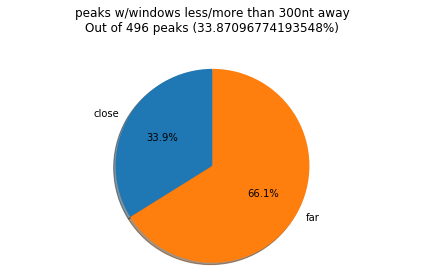

In [26]:
# The slices will be ordered and plotted counter-clockwise.

plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/windows less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

In [27]:
closest = random.closest(filtered_window, t='first', k=1, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)
print(closest.shape[0])
closest.head()

496


,pchrom,pstart,pend,pname,pscore,pstrand,echrom,estart,eend,ename,escore,estrand,dist
0,chr1,1248006,1248118,ENSG00000188878.12,5.29546200283044,-,chr1,1254696,1254745,446,3,-,6579
1,chr1,3712472,3712524,ENSG00000164877.14,3.62227231909755,-,chr1,3697544,3697593,74,3,-,14880
2,chr1,8716056,8716169,ENSG00000122140.6,3.47890814392637,+,chr1,8415009,8415058,75,6,-,300999
3,chr1,9643975,9644024,ENSG00000168101.10,3.7526689563532205,+,chr1,9640043,9640092,182,5,+,3884
4,chr1,10365518,10365637,ENSG00000154358.15,4.5421019704135706,+,chr1,10366090,10366139,85,3,+,454


In [28]:
close = closest[(np.abs(closest['dist']) <= d) & (closest['estart']!=-1)].shape[0]
far = closest[(np.abs(closest['dist']) > d) | (closest['estart']==-1)].shape[0]

# Random peaks with edit windows more/less than [d] distance away.

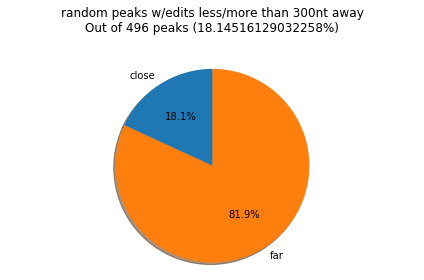

In [29]:
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("random peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

# Do we see a consistent pattern between peaks with a motif?
- These are peaks that I've parsed out that are found to have a motif within the peak. 

In [30]:
peaks = read_and_return_peak_bedtool(peak_with_motif_file, annotated='motif')
edits = pybedtools.BedTool.from_dataframe(edits_df).sort()

270
270
257


In [31]:
closest = peaks.closest(edits, s=True, t='first', k=1, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)
print(closest.shape[0])
closest.sort_values(by='dist', ascending=False).head()

257


,pchrom,pstart,pend,pname,pscore,pstrand,echrom,estart,eend,ename,escore,estrand,dist
114,chr17,77756131,77756256,TGGCCTTCTCGGGACTGTCCTGTCACCCCTCCTCGCTACAGTGATG...,0,+,chr17,76221160,76221161,3utr,0.993825,+,1534971
113,chr17,77755899,77755987,CAGGGGGTCCTTGGGGGACGGAAAGGAACAGGAAGCATGCGTACAG...,0,+,chr17,76221160,76221161,3utr,0.993825,+,1534739
191,chr3,187896972,187897175,TGCTGCCCTCCAAGGCTTTTGAATTTGCCACCGTGAAGAGCATGCA...,"0,0",+,chr3,186796272,186796273,3utr,0.992751,+,1100700
224,chr7,82543863,82543944,CATGTTTAATTTCCCTTCTCCAGAGATGTATCCTACTTTTCTTGGT...,0,-,chr7,81576763,81576764,3utr,0.999020,-,967100
223,chr7,82543784,82543844,TGTGTATAGATTCTGTAGCATGCTTTTCTTTATTTAGTTTTACTTT...,0,-,chr7,81576763,81576764,3utr,0.999020,-,967021


In [32]:
close = closest[(np.abs(closest['dist']) <= d) & (closest['estart']!=-1)].shape[0]
far = closest[(np.abs(closest['dist']) > d) | (closest['estart']==-1)].shape[0]
print(close, far)

98 159


# Peaks (with motif) with edit windows more/less than [d] distance away.

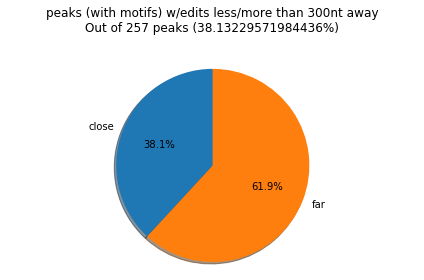

In [33]:
# The slices will be ordered and plotted counter-clockwise.

plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks (with motifs) w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

In [34]:
random = peaks.shuffle(genome='hg19', incl=regions_file_for_random_subset_expressed, noOverlapping=True)
random = random.sort()
random_df = random.to_dataframe()
random_df.head()

,chrom,start,end,name,score,strand
0,chr1,879441,879515,tagattgcatgcctttttggaacaacttggggagagaagtggagac...,0,+
1,chr1,19501465,19501668,TGCTGCCCTCCAAGGCTTTTGAATTTGCCACCGTGAAGAGCATGCA...,"0,0",+
2,chr1,20238930,20238970,TGGGAGTGTGCGGGTGTGGGCCTTGGCCAGCATGGAGCTT,0,+
3,chr1,23417312,23417388,GGCTCCCCGCATGCAGCGGGCCCGTTCCTCCCCTCGCCACCTGGCT...,0,+
4,chr1,32696792,32696930,GCAGCCTGGTCTACCCCAAGTGCATGCCCCGCCTCTCCTCTCTCCC...,0,+


In [35]:
closest = random.closest(edits, t='first', k=1, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)
print(closest.shape[0])
closest.head()

257


,pchrom,pstart,pend,pname,pscore,pstrand,echrom,estart,eend,ename,escore,estrand,dist
0,chr1,879441,879515,tagattgcatgcctttttggaacaacttggggagagaagtggagac...,0,+,chr1,879676,879677,3utr,0.999909,-,162
1,chr1,19501465,19501668,TGCTGCCCTCCAAGGCTTTTGAATTTGCCACCGTGAAGAGCATGCA...,"0,0",+,chr1,19544326,19544327,3utr,0.997310,-,42659
2,chr1,20238930,20238970,TGGGAGTGTGCGGGTGTGGGCCTTGGCCAGCATGGAGCTT,0,+,chr1,19953049,19953050,3utr,0.990840,+,285881
3,chr1,23417312,23417388,GGCTCCCCGCATGCAGCGGGCCCGTTCCTCCCCTCGCCACCTGGCT...,0,+,chr1,23631440,23631441,3utr,0.994820,-,214053
4,chr1,32696792,32696930,GCAGCCTGGTCTACCCCAAGTGCATGCCCCGCCTCTCCTCTCTCCC...,0,+,chr1,32642058,32642059,3utr,0.991416,+,54734


In [36]:
closest.drop_duplicates('estart').shape[0]

253

In [37]:
close = closest[(np.abs(closest['dist']) <= d) & (closest['estart']!=-1)].shape[0]
far = closest[(np.abs(closest['dist']) > d) | (closest['estart']==-1)].shape[0]
print(close, far)

46 211


# Random peaks with edits more/less than [d] distance away.

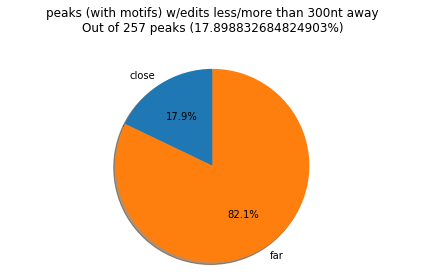

In [38]:
# The slices will be ordered and plotted counter-clockwise.

plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks (with motifs) w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

# What if we require at least 2 edits be nearby?

In [39]:
# peaks = read_and_return_peak_bedtool(annotated_peak_file, annotated='yes')

avoid_these_real_peak_regions = peaks.slop(b=d, g=chrom_sizes).sort()
avoid_these_real_peak_regions = avoid_these_real_peak_regions.to_dataframe()
avoid_these_real_peak_regions.to_csv(os.path.join(output_dir, 'tmp_slopped.bed'), sep='\t', header=False, index=False)

random = peaks.shuffle(genome='hg19', incl=regions_file_for_random_subset_expressed, noOverlapping=True)
random = random.sort()



In [40]:
def is_close(row, d=d, req=2):
    """
    parses out a merged BEDfile (c=(4,5,6), o=('collapse','collapse','distinct'))
    d = distance threshold for an edit to be 'close'
    req = number of edits that need to meet this threshold
    """
    close_edits = 0
    far_edits = 0
    estarts = row['name'].split(',')
    distances = row['score'].split(',')

    for distance, estart in zip(distances, estarts):
        if int(distance) <= d and int(estart) != -1:
            close_edits += 1
        else:
            far_edits += 1
    if close_edits >= req:
        return True
    else:
        return False

In [41]:
closest = peaks.closest(edits, s=True, t='all', k=2, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)[['pchrom','pstart','pend','estart','dist','pstrand']]
closest.columns = ['chrom','start','end','name','score','strand']
print(closest.shape[0])
closest = pybedtools.BedTool.from_dataframe(closest)
closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()

closest['close'] = closest.apply(is_close, args=(d, 2,), axis=1)
print(closest.shape[0])
closest.head()

567
257


,chrom,start,end,name,score,strand,close
0,chr1,11721467,11721549,"11722215,11722312","667,764",+,False
1,chr1,23686061,23686172,"23686098,23637438","0,48623",-,False
2,chr1,24791668,24791742,"24795813,24787016","4072,4652",+,False
3,chr1,32955632,32955713,"32951084,33066124","4548,110412",+,False
4,chr1,36387382,36387408,"36387921,36386693","514,689",+,False


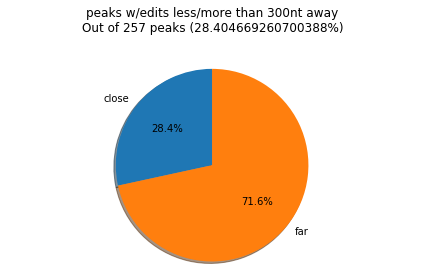

In [42]:
# The slices will be ordered and plotted counter-clockwise.
close = closest[closest['close']==True].shape[0]
far = closest[closest['close']==False].shape[0]
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

In [43]:
closest = random.closest(edits, t='all', k=2, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)[['pchrom','pstart','pend','estart','dist','pstrand']]
closest.columns = ['chrom','start','end','name','score','strand']
print(closest.shape[0])
closest = pybedtools.BedTool.from_dataframe(closest)
closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()

closest['close'] = closest.apply(is_close, args=(d, 2,), axis=1)
print(closest.shape[0])
closest.head()

523
257


,chrom,start,end,name,score,strand,close
0,chr1,1228016,1228072,"1254720,1270681","26649,42610",-,False
1,chr1,3545064,3545120,"3697568,2336994","152449,1208070",-,False
2,chr1,23636654,23636740,"23636673,23636713","0,0",-,True
3,chr1,24293120,24293295,"24293220,24293112","0,8",-,True
4,chr1,28608925,28609005,"28608148,28563958","777,44967",-,False


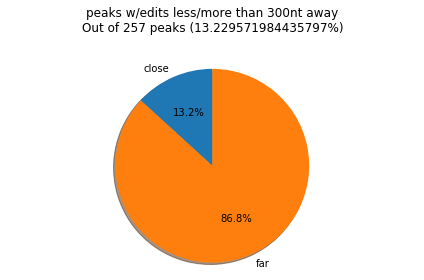

In [44]:
# The slices will be ordered and plotted counter-clockwise.
close = closest[closest['close']==True].shape[0]
far = closest[closest['close']==False].shape[0]
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

# What if we require at least 3 edits be nearby?

In [45]:
closest = peaks.closest(edits, s=True, t='all', k=3, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)[['pchrom','pstart','pend','estart','dist','pstrand']]
closest.columns = ['chrom','start','end','name','score','strand']
print(closest.shape[0])
closest = pybedtools.BedTool.from_dataframe(closest)
closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()

closest['close'] = closest.apply(is_close, args=(d, 3,), axis=1)
print(closest.shape[0])
closest.head()

804
257


,chrom,start,end,name,score,strand,close
0,chr1,11721467,11721549,"11722215,11722312,12072638","667,764,351090",+,False
1,chr1,23686061,23686172,"23686098,23637438,23636809","0,48623,49252",-,False
2,chr1,24791668,24791742,"24795813,24787016,24797077","4072,4652,5336",+,False
3,chr1,32955632,32955713,"32951084,33066124,33066257","4548,110412,110545",+,False
4,chr1,36387382,36387408,"36387921,36386693,36388255","514,689,848",+,False


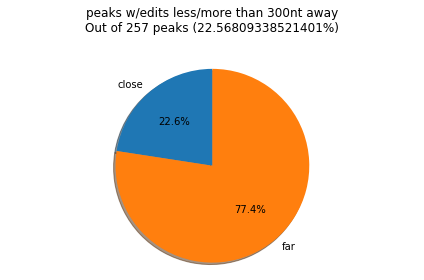

In [46]:
# The slices will be ordered and plotted counter-clockwise.
close = closest[closest['close']==True].shape[0]
far = closest[closest['close']==False].shape[0]
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

In [47]:
closest = random.closest(edits, t='all', k=3, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)[['pchrom','pstart','pend','estart','dist','pstrand']]
closest.columns = ['chrom','start','end','name','score','strand']
print(closest.shape[0])
closest = pybedtools.BedTool.from_dataframe(closest)
closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()

closest['close'] = closest.apply(is_close, args=(d, 3,), axis=1)
print(closest.shape[0])
closest.head()

775
257


,chrom,start,end,name,score,strand,close
0,chr1,1228016,1228072,"1254720,1270681,1270683","26649,42610,42612",-,False
1,chr1,3545064,3545120,"3697568,2336994,2241468","152449,1208070,1303596",-,False
2,chr1,23636654,23636740,"23636673,23636713,23636752","0,0,13",-,True
3,chr1,24293120,24293295,"24293220,24293112,24293060","0,8,60",-,True
4,chr1,28608925,28609005,"28608148,28563958,28563918","777,44967,45007",-,False


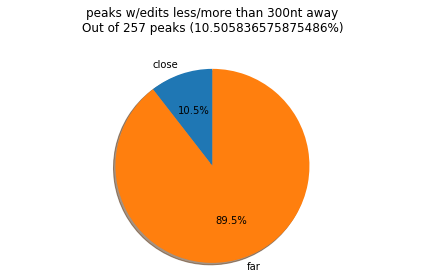

In [48]:
# The slices will be ordered and plotted counter-clockwise.
close = closest[closest['close']==True].shape[0]
far = closest[closest['close']==False].shape[0]
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

# How about...10?

In [49]:
closest = peaks.closest(edits, s=True, t='all', k=10, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)[['pchrom','pstart','pend','estart','dist','pstrand']]
closest.columns = ['chrom','start','end','name','score','strand']
print(closest.shape[0])
closest = pybedtools.BedTool.from_dataframe(closest)
closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()

closest['close'] = closest.apply(is_close, args=(d, 10,), axis=1)
print(closest.shape[0])
closest.head()

2574
257


,chrom,start,end,name,score,strand,close
0,chr1,11721467,11721549,"11722215,11722312,12072638,12072681,12072702,1...","667,764,351090,351133,351154,351229,351716,351...",+,False
1,chr1,23686061,23686172,"23686098,23637438,23636809,23636752,23636713,2...","0,48623,49252,49309,49348,49388,49439,49471,49...",-,False
2,chr1,24791668,24791742,"24795813,24787016,24797077,24797130,24797134,2...","4072,4652,5336,5389,5393,7552,7604,7630,7633,7635",+,False
3,chr1,32955632,32955713,"32951084,33066124,33066257,33066280,32799105,3...","4548,110412,110545,110568,156527,156656,156714...",+,False
4,chr1,36387382,36387408,"36387921,36386693,36388255,36388884,36385889,3...","514,689,848,1477,1493,3103,64326,64360,64398,6...",+,False


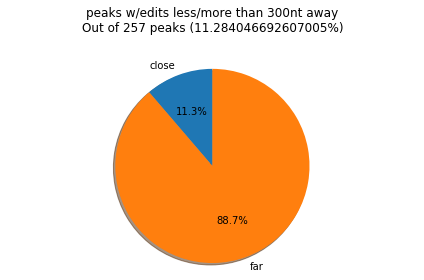

In [50]:
# The slices will be ordered and plotted counter-clockwise.
close = closest[closest['close']==True].shape[0]
far = closest[closest['close']==False].shape[0]
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

In [51]:
closest = random.closest(edits, t='all', k=10, d=True).to_dataframe(
    names=[
        'pchrom','pstart','pend','pname','pscore','pstrand',
        'echrom','estart','eend','ename','escore','estrand',
        'dist'
    ]
)[['pchrom','pstart','pend','estart','dist','pstrand']]
closest.columns = ['chrom','start','end','name','score','strand']
print(closest.shape[0])
closest = pybedtools.BedTool.from_dataframe(closest)
closest = closest.merge(s=True, c=(4,5,6), o=('collapse','collapse','distinct')).to_dataframe()

closest['close'] = closest.apply(is_close, args=(d, 10,), axis=1)
print(closest.shape[0])
closest.head()

2570
257


,chrom,start,end,name,score,strand,close
0,chr1,1228016,1228072,"1254720,1270681,1270683,1270721,1337386,133740...","26649,42610,42612,42650,109315,109329,109359,2...",-,False
1,chr1,3545064,3545120,"3697568,2336994,2241468,2241465,2241001,224013...","152449,1208070,1303596,1303599,1304063,1304925...",-,False
2,chr1,23636654,23636740,"23636673,23636713,23636752,23636622,23636590,2...","0,0,13,32,64,70,98,172,211,233",-,True
3,chr1,24293120,24293295,"24293220,24293112,24293060,24293561,24292539,2...","0,8,60,267,581,608,694,863,1458,1460",-,False
4,chr1,28608925,28609005,"28608148,28563958,28563918,28563774,28563761,2...","777,44967,45007,45151,45164,45195,45633,81221,...",-,False


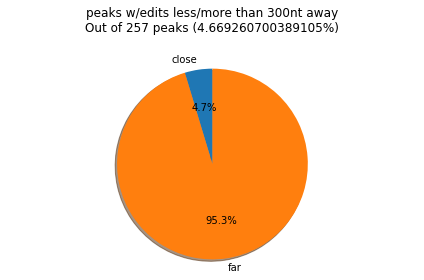

In [52]:
# The slices will be ordered and plotted counter-clockwise.
close = closest[closest['close']==True].shape[0]
far = closest[closest['close']==False].shape[0]
plt.pie([close, far], labels=['close','far'],
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("peaks w/edits less/more than {}nt away\nOut of {} peaks ({}%)".format(d, close+far, (100*close)/(close+far)),y=1.1)
plt.tight_layout()

# Look on genome browser to see what's so interesting about these edits. These are likely false positives? Or perhaps real binding sites that just aren't found by eCLIP?

In [53]:
closest[closest['close']==True]

,chrom,start,end,name,score,strand,close
2,chr1,23636654,23636740,"23636673,23636713,23636752,23636622,23636590,2...","0,0,13,32,64,70,98,172,211,233",-,True
35,chr10,126086280,126086330,"126086294,126086301,126086320,126086265,126086...","0,0,0,15,15,18,25,28,35,38",-,True
43,chr11,74688734,74688758,"74688695,74688692,74688649,74688648,74688633,7...","39,42,85,86,101,111,115,119,143,274",+,True
52,chr12,13233633,13233681,"13233725,13233754,13233758,13233759,13233762,1...","45,74,78,79,82,88,109,116,118,128",+,True
81,chr15,45899141,45899185,"45898965,45898948,45899393,45898912,45899414,4...","176,193,209,229,230,240,245,267,270,288",+,True
146,chr21,45193906,45193990,"45193929,45193985,45193990,45193901,45194012,4...","0,0,1,5,23,34,38,54,79,86",-,True
177,chr4,151186582,151186694,"151186653,151186670,151186684,151186715,151186...","0,0,0,22,28,32,42,45,45,67",-,True
179,chr4,183811600,183811683,"183811643,183811829,183811432,183811421,183811...","0,147,168,179,200,220,235,263,265,283",-,True
190,chr5,179662853,179662906,"179662874,179662846,179662842,179662831,179662...","0,7,11,22,25,42,42,63,82,114",+,True
235,chr9,21865905,21865958,"21865899,21865894,21865882,21865878,21865867,2...","6,11,23,27,38,78,92,94,96,112",+,True


In [ ]:
1